In [157]:
#downloading dataset, importing libraries

import pandas as pd

import numpy as np

import os

import matplotlib.pyplot as plt

import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [158]:
#reading the dataset, deleting missing value entries
df = pd.read_csv('Admission_Predict.csv')



df.head()

df.dropna()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [159]:
#QUESTIONS:
print("Is this a supervised or unsupervised learning problem?")
print("Is this a regression, classification, or clustering problem?")
print("Is the data linear or non-linear?")
print("Which regression/classification/clustering model is most suitable?")

Is this a supervised or unsupervised learning problem?
Is this a regression, classification, or clustering problem?
Is the data linear or non-linear?
Which regression/classification/clustering model is most suitable?


In [160]:
#ANSWERS:
print("This is supervised learning, as features and labels are known")
print("This is a regression problem; as the objective is to calculate probability of admission, based on given parameters")
print("This data is linear, with dependent variable(predicted value of y) and independent variables(GRE score, TOEFL score, GPA etc)")
print("Linear regression can be used, as there is a relationship between dependent and independent variables")


This is supervised learning, as features and labels are known
This is a regression problem; as the objective is to calculate probability of admission, based on given parameters
This data is linear, with dependent variable(predicted value of y) and independent variables(GRE score, TOEFL score, GPA etc)
Linear regression can be used, as there is a relationship between dependent and independent variables


In [161]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [162]:
df.drop('Serial No.',axis=1,inplace=True)

In [163]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [164]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [165]:
#SPLITTING VARIABLES
#independent variables
x = df[['GRE Score','TOEFL Score','SOP','CGPA']]

In [166]:
# dependent variable
y = df[['Chance of Admit ']]

In [167]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size=.20)

In [168]:
LinReg = LinearRegression()


In [169]:
LinReg.fit(x_train,y_train)

LinearRegression()

In [170]:
y_predict = LinReg.predict(x_test)

In [171]:
y_predict[:10]

array([[0.69519545],
       [0.70683845],
       [0.77643911],
       [0.64001351],
       [0.73283448],
       [0.6165264 ],
       [0.72358641],
       [0.6345092 ],
       [0.90050354],
       [0.90471303]])

In [172]:
y_test[:10]

,Chance of Admit
132,0.71
309,0.70
341,0.79
196,0.73
246,0.72
60,0.48
155,0.77
261,0.71
141,0.90
214,0.94


In [173]:
#printing Linear Regression error score

LRScore = r2_score(y_test, y_predict)

In [174]:
print (LRScore)

0.7180965918133166


In [175]:
#training Random Forest Regressor model


RFR = RandomForestRegressor(n_estimators = 100, random_state = 101)
RFR.fit(x_train,y_train)
y_head_rfr = RFR.predict(x_test)

C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [176]:
#printing Random Forest Regressor error
RFRscore = r2_score(y_test,y_head_rfr)

In [177]:
y_head_rfr[:10]

array([0.6941, 0.6467, 0.7578, 0.6615, 0.7449, 0.6621, 0.7321, 0.6758,
       0.9272, 0.9275])

In [178]:
print(RFRscore)

0.6319887642672052


In [179]:
#training DecisionTreeRegressor model
DTR = DecisionTreeRegressor(random_state = 101)
DTR.fit(x_train,y_train)
y_head_DTR = DTR.predict(x_test) 


In [180]:
#printing decision tree prediction
y_head_DTR[:10]

array([0.66, 0.7 , 0.79, 0.67, 0.78, 0.73, 0.71, 0.75, 0.93, 0.93])

In [181]:
#printing Decision Tree Regression score
DTRscore = r2_score(y_test, y_head_DTR)
print(DTRscore)

0.43353467174785987


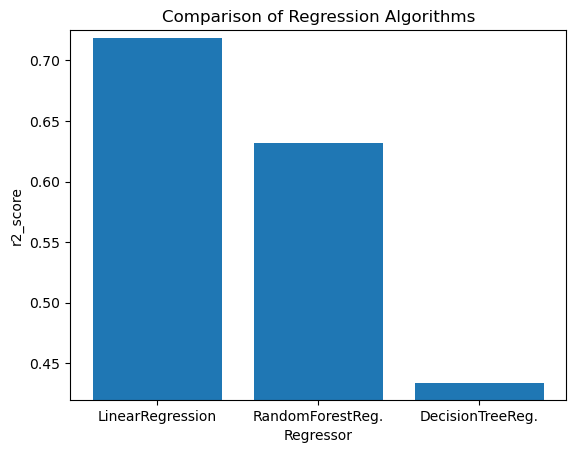

In [182]:
#COMPARISON OF REGRESSOR MODELS AND THEIR ACCURACY SCORES.
y = np.array([LRScore, RFRscore, DTRscore])
x = ["LinearRegression","RandomForestReg.","DecisionTreeReg."]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.ylim(0.42,0.725)
plt.show()

In [183]:
# model selection:
print("as per the above visualization(plot), Linear Regression gives highest accuracy score")

as per the above visualization(plot), Linear Regression gives highest accuracy score
